# This Notebook reads in `alldata` files from the **Rat Trap** and creates spectra  

In [34]:
import numpy as np
import matplotlib.pyplot as plt

from pathlib import Path
from utils.basic_funcs import *


### Read in all runs contained in the folder 'Data'

In [43]:
data_folder_path = Path.cwd() / "Data"
spectra = get_spectra(data_folder_path,runs='all',rows_to_skip=2)

### Do some basic processing on the raw spectra

In [49]:
spectra = background_subtract(spectra,start_energy=5440)
spectra = normalize(spectra)
x_peak_pos = spectra[0][np.argmax(spectra[1])]
spectra = plottrim(spectra,-25,10,relative_position=x_peak_pos)

Optimization terminated successfully.


### Finally, plot the processed spectra

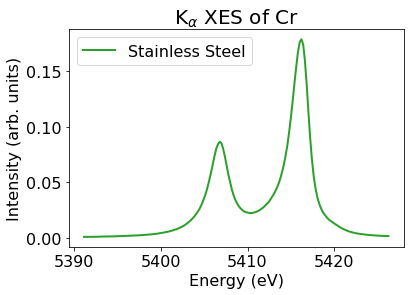

In [52]:
fig, ax = plt.subplots(figsize=(6, 4))

ax.plot(spectra[0], spectra[1], c=plt.cm.tab10(2), linewidth=2,
        label="Stainless Steel")

ax.set_title(r'K${\alpha}$ XES of Cr', fontsize=20)
ax.set_xlabel('Energy (eV)', fontsize=16)
ax.set_ylabel('Intensity (arb. units)', fontsize=16)
ax.tick_params(direction='out', labelsize=16)
ax.legend(fontsize=16,loc=2,fancybox=True)

# plt.savefig('Stainless Steel K alpha.png', bbox_inches='tight', dpi=800)
plt.show()